* 欢迎关注公众号“Dathon数据分析”，给你带更多数据分析的干货！

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 数据探索 - 数据预处理 -- 特征工程 -- 模型训练 -- 模型评估

* 1、读入数据

In [3]:
df = pd.read_csv('tax.csv')

In [4]:
# 缺失值处理
df.isnull().sum().sum()

0

In [5]:
df['label'].value_counts()

正常    71
异常    53
Name: label, dtype: int64

In [6]:
df.describe()

,tax_num,sales_profit,maintenance_profit,maintenance_revenue_rate,vat_burden,inventory_turnover,cost_profit_rate,theoretical_tax_burden,total_tax_control,\nlicensing_rate,single_station_fee,\nagent_insurance_rate,premium_return_rate
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,62.500000,0.023709,0.154894,0.068717,0.008287,11.036540,0.174839,0.010435,0.006961,0.146077,0.016387,0.169976,0.039165
std,35.939764,0.103790,0.414387,0.158254,0.013389,12.984948,1.121757,0.032753,0.008926,0.236064,0.032510,0.336220,0.065910
min,1.000000,-1.064600,-3.125500,0.000000,0.000000,0.000000,-1.000000,-0.181000,-0.007000,0.000000,0.000000,0.000000,-0.014800
25%,31.750000,0.003150,0.000000,0.000000,0.000475,2.459350,-0.004075,0.000725,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62.500000,0.025100,0.156700,0.025950,0.004800,8.421250,0.000500,0.009100,0.006000,0.000000,0.000000,0.000000,0.000000
75%,93.250000,0.049425,0.398925,0.079550,0.008800,15.199725,0.009425,0.015925,0.011425,0.272325,0.020000,0.138500,0.081350
max,124.000000,0.177400,1.000000,1.000000,0.077000,96.746100,9.827200,0.159300,0.057000,0.877500,0.200000,1.529700,0.270000


In [7]:
df['label'].value_counts()

正常    71
异常    53
Name: label, dtype: int64

* 特征工程

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [9]:
le = preprocessing.LabelEncoder()
df['sale_type'] = le.fit(df['sale_type']).transform(df['sale_type'])
df['sale_mode'] = le.fit(df['sale_mode']).transform(df['sale_mode'])
df['label'] = df['label'].map(lambda s: 0 if s=='正常' else 1)

x = df.iloc[:,1:-1]
y = df['label']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [11]:
from sklearn import tree

In [12]:
clf = tree.DecisionTreeClassifier(criterion="gini",max_depth=3)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

* 模型评估

In [13]:
from sklearn.metrics import f1_score

In [14]:
y_pre = clf.predict(x_test)

In [15]:
f1_score(y_test,y_pre)

0.9411764705882353

* 过拟合检测

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [17]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(2, 1, figsize=(15, 12))

    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    return plt

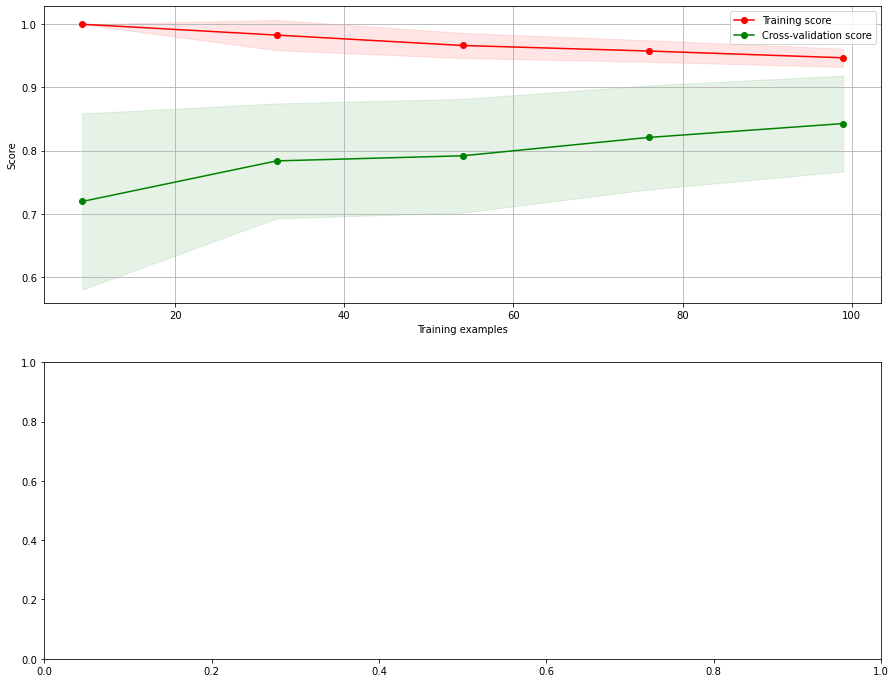

In [18]:
# fig, axes = plt.subplots(2, 2, figsize=(10, 15))


cv = ShuffleSplit(n_splits=len(x), test_size=0.2, random_state=0)

plot_learning_curve(clf, '123' ,x, y, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

* dtreeviz作图

In [19]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(clf,
               x_train,
               y_train,
               target_name='',
               feature_names=np.array(x.columns),
               class_names=['0','1'])

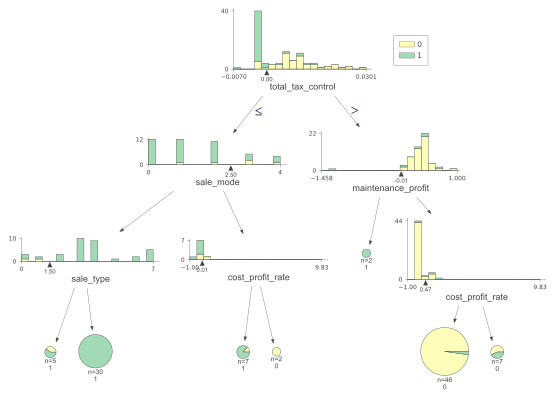

In [20]:
viz

* graphviz作图

In [21]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=list(x.columns),  
                     class_names=['0','1'],  
                     filled=True, rounded=True,  
                     special_characters=True)  

In [22]:
graph = graphviz.Source(dot_data)

In [23]:
x_train

,sale_type,sale_mode,sales_profit,maintenance_profit,maintenance_revenue_rate,vat_burden,inventory_turnover,cost_profit_rate,theoretical_tax_burden,total_tax_control,\nlicensing_rate,single_station_fee,\nagent_insurance_rate,premium_return_rate
5,7,0,0.0484,0.6814,0.0064,0.0031,15.2445,0.0012,0.0063,0.0089,0.1837,0.04,0.0942,0.2700
25,4,1,0.0091,0.0000,0.0000,0.0028,40.0488,0.0004,-0.0012,0.0000,0.0000,0.00,0.0000,0.0000
69,3,0,0.0000,0.3647,0.0088,0.0004,14.8937,-0.0428,0.0181,0.0014,0.1293,0.05,0.1195,0.0800
32,3,4,0.0129,0.1553,0.0024,0.0173,15.0749,-0.0190,-0.0008,0.0022,0.6333,0.02,0.0000,0.0000
96,1,2,0.0235,0.0000,0.0000,0.0026,12.0229,-0.0025,0.0200,0.0000,0.0000,0.00,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,3,0,0.0193,0.1952,0.1040,0.0035,10.4175,0.0101,0.0198,0.0186,0.0490,0.01,0.0000,0.0000
108,3,0,0.0471,0.4431,0.0778,0.0086,21.3278,0.0027,0.0115,0.0083,0.3321,0.02,0.3937,0.1298
111,4,2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000
45,6,0,0.0767,1.0000,0.0473,0.0111,23.2464,0.0000,0.0157,0.0180,0.0000,0.00,0.0000,0.0000


In [24]:
df_c  = pd.concat([x_train,y_train],axis=1)

In [25]:
df_c [(df_c['total_tax_control']<=0.002)&(df_c ['sale_mode']<=2.5)&(df_c ['sale_type']>1.5)]['label'].value_counts()

1    29
Name: label, dtype: int64

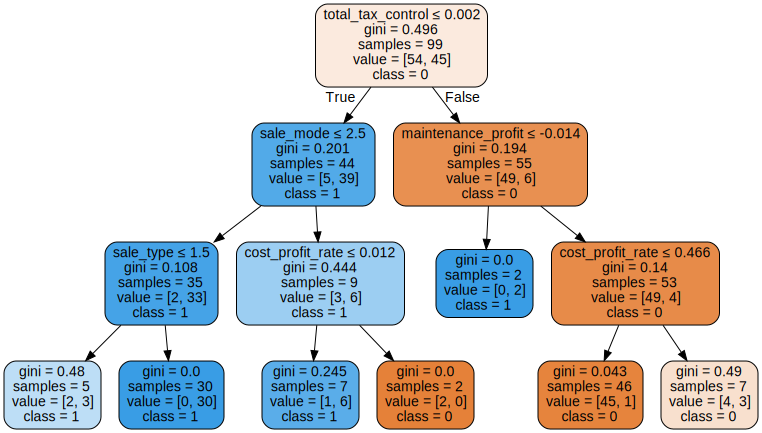

In [26]:
graph

In [163]:
# tree.export_graphviz(clf, out_file='tree.dot')

* 欢迎关注公众号“Dathon数据分析”，给你带更多数据分析的干货！